#PROVA FINAL ANTIGA

###**Questão nro. 1 (2 pontos):**

 Implemente um programa em C++ que gere n números aleatórios inteiros (entre 1 e 999), populando um vetor. Fazendo uso de OpenMP, calcule a média e desvio padrão dos elementos deste vetor. Você deve testar para n grandes, produzindo um gráfico onde X é o tamanho de n e Y é o tempo de execução. Teste também seu programa para rodar com 2, 3, 5, 7 e 9 threads, avaliando o desempenho. Entregue o código-fonte, o gráfico gerado e comentários sobre o desempenho conforme o número de threads foi sendo modificado.

Primeiro jeito resolvido com argv e uniform distribution.

In [ ]:
%%writefile questao1.cpp

#include <iostream>
#include <stdlib.h>
#include <chrono>
#include <random>
#include <vector>
#include <omp.h>
#include <iomanip>
#include <math.h>
# include <time.h>
using namespace std;


int main(int argc, char *argv[]){
  int n = atoi(argv[1]);  // n aleatório dado pelo usuário. 
  int n_threads = atoi(argv[2]);

  unsigned seed = chrono::system_clock::now().time_since_epoch().count();
  default_random_engine generator(seed);

  uniform_int_distribution<int> gerador(1, 999);

  omp_set_num_threads(n_threads);
  vector<int> numeros_aleatorios(n);

  // ou poderia ter gerado os números aleatórios assim:
  //srand(time(NULL));  // Inicializar a semente da função rand com base no tempo atual

  for (int i = 0; i < n; i++){
    int num = gerador(generator);
    //int num = (rand()%1000) + 1;
    numeros_aleatorios[i] = num;
    //cout  << "Número sorteado: " << numeros_aleatorios[i] << endl;
  }

  int total_sum = 0;
  #pragma omp parallel for reduction(+ : total_sum)
  for (int i = 0; i < n; i++){
    total_sum+= numeros_aleatorios[i];
  }

  double media = (double)total_sum/(double)n;

  double soma_local_dp = 0.0;
  #pragma omp parallel for reduction(+ : soma_local_dp)
  for (int i = 0; i < n; i++){
    soma_local_dp+= pow(((double)numeros_aleatorios[i] - media), 2);
  }

  double std = sqrt(soma_local_dp/n);

  //cout << "Média calculada: " << media << endl;
  //cout << "Desvio padrão calculado: " << std << endl;
}



Writing questao1.cpp


In [ ]:
!g++ -Wall -O3 -fopenmp -g questao1.cpp -o questao1

questao1.cpp: In function ‘int main(int, char**)’:
questao1.cpp:50:10: warning: unused variable ‘std’ [-Wunused-variable]
   50 |   double std = sqrt(soma_local_dp/n);
      |          ^~~


In [ ]:
!./questao1 10 2

Média calculada: 459.8
Desvio padrão calculado: 300.069


Agora, será gerado grafico em que em x - temos n random e y - tempo.

In [ ]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import os
import pandas as pd
import time
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D
import random
import itertools as it

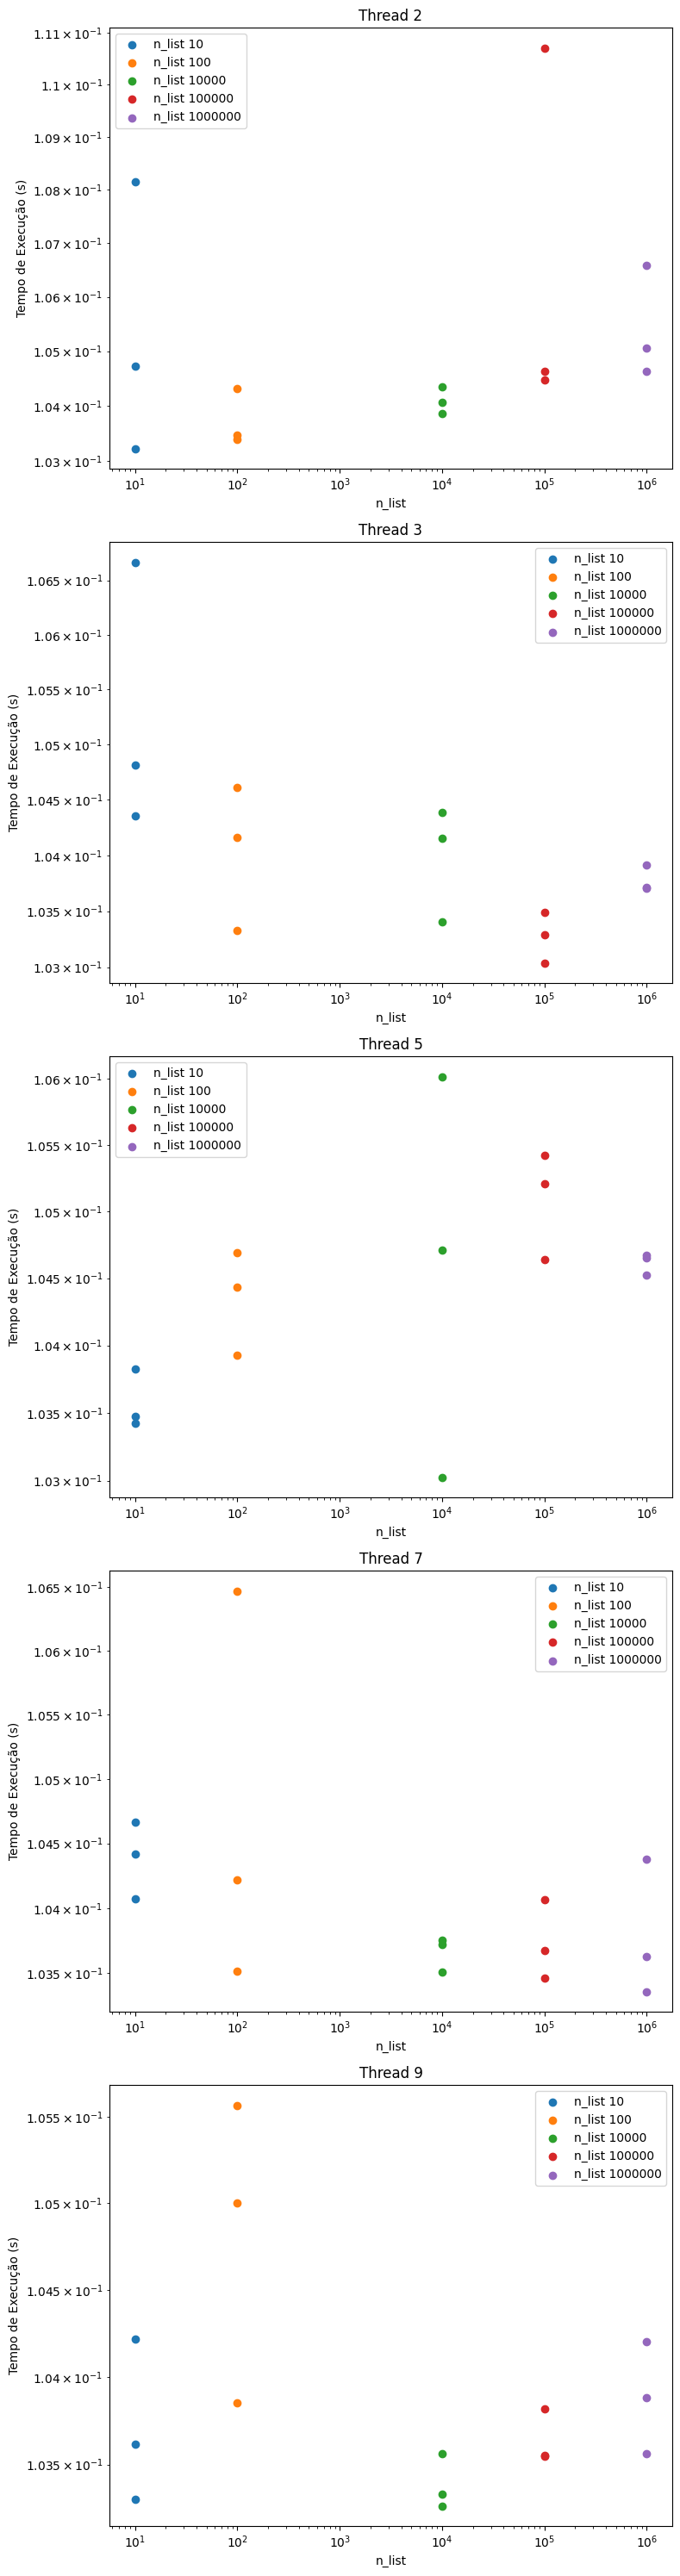

In [ ]:
import time
import matplotlib.pyplot as plt

n_list = [10, 100, 10000, 100000, 1000000]  # x
threads = [2, 3, 5, 7, 9]

def gera_runtime_dict(thread, runtime_dict, n_list):
    for i in range(len(n_list)):
        runtimes = []
        for _ in range(3):
            start_time = time.time()
            !./questao1 {n_list[i]} {thread}
            runtime = time.time() - start_time
            runtimes.append(runtime)
        runtime_dict[i] = runtimes
    return runtime_dict

fig, ax = plt.subplots(len(threads), 1, figsize=(8, 6*len(threads)))

for j in range(len(threads)):
    runtime_dict_thread = {}
    runtime_dict_thread = gera_runtime_dict(threads[j], runtime_dict_thread, n_list)
    ax[j].set_xscale('log')
    ax[j].set_yscale('log')
    ax[j].set_xlabel('n_list')
    ax[j].set_ylabel('Tempo de Execução (s)')
    ax[j].set_title(f'Thread {threads[j]}')
    
    for i in range(len(n_list)):
        x = [n_list[i]] * len(runtime_dict_thread[i])
        y = runtime_dict_thread[i]
        ax[j].scatter(x, y, label=f'n_list {n_list[i]}')
    
    ax[j].legend()

plt.tight_layout()
plt.show()


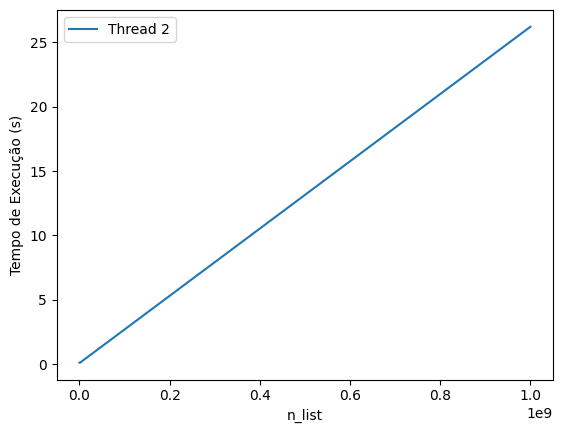

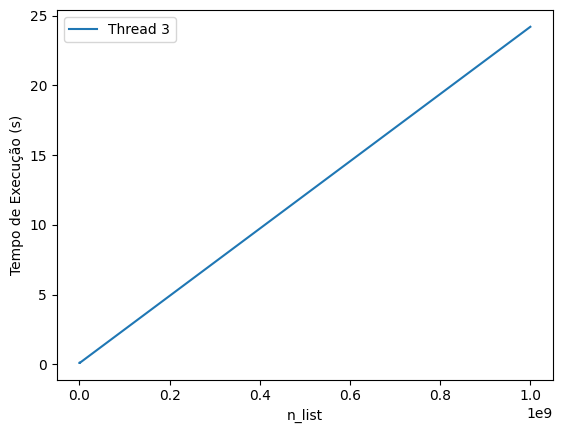

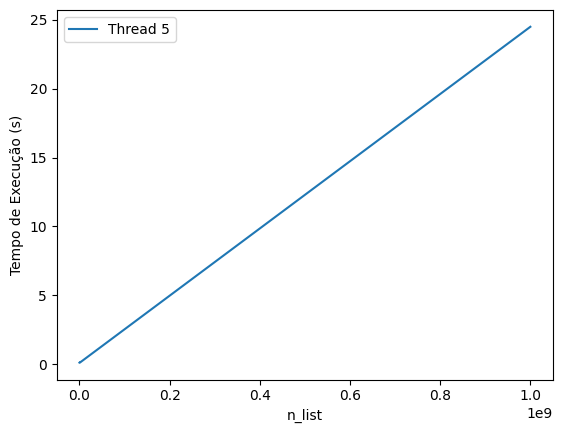

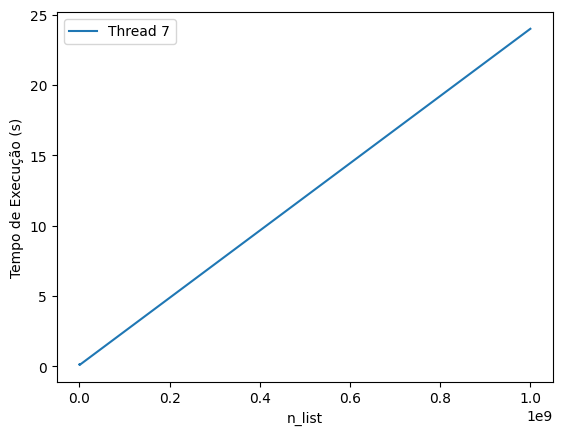

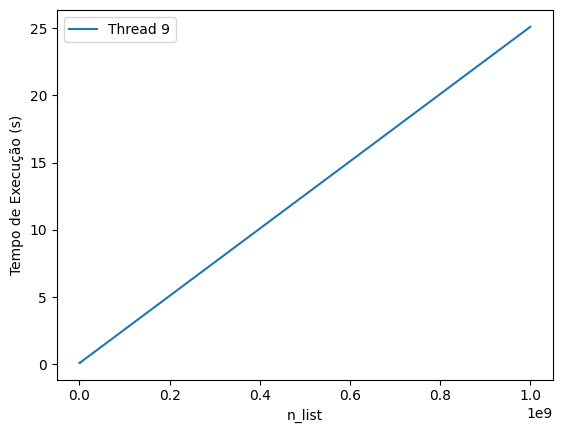

In [ ]:
# POR PRECAUÇÃO - um jeito simples

runtime_dict = {0: [], 1: [], 2: [], 3: [], 4:[]}  # y
n_list = [1000, 10000,100000, 1000000, 1000000000] # x
threads = [2, 3, 5, 7, 9]

for i in range(len(n_list)):
    for j in range(len(threads)):
        start_time = time.time()
        !./questao1 {n_list[i]} {threads[j]}
        runtime = time.time() - start_time
        runtime_dict[j].append(runtime)
      
# Plotar os gráficos para cada thread
for j in range(len(threads)):
    plt.plot(n_list, runtime_dict[j], label=f'Thread {threads[j]}')
    plt.xlabel('n_list')  #coloquei essas linhas porque quero plotar um pra cada. e não um gráfico pra todas
    plt.ylabel('Tempo de Execução (s)')
    plt.legend()
    plt.show()

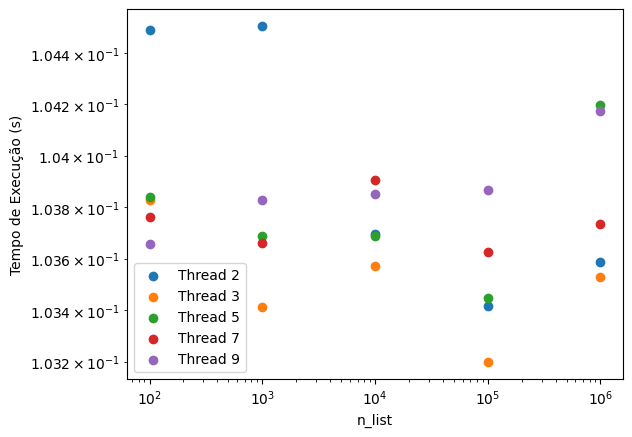

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

runtime_dict = {0: [], 1: [], 2: [], 3: [], 4: []}  # y
n_list = [100, 1000, 10000, 100000, 1000000]  # x
threads = [2, 3, 5, 7, 9]

num_runs = 10

for i in range(len(n_list)):
    for j in range(len(threads)):
        runtimes = []
        for _ in range(num_runs):
            start_time = time.time()
            !./questao1 {n_list[i]} {threads[j]}
            runtime = time.time() - start_time
            runtimes.append(runtime)
        avg_runtime = np.mean(runtimes)
        runtime_dict[j].append(avg_runtime)

# Scatter plot para cada thread
for j in range(len(threads)):
    plt.scatter(n_list, runtime_dict[j], label=f'Thread {threads[j]}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n_list')
plt.ylabel('Tempo de Execução (s)')
plt.legend()
plt.show()


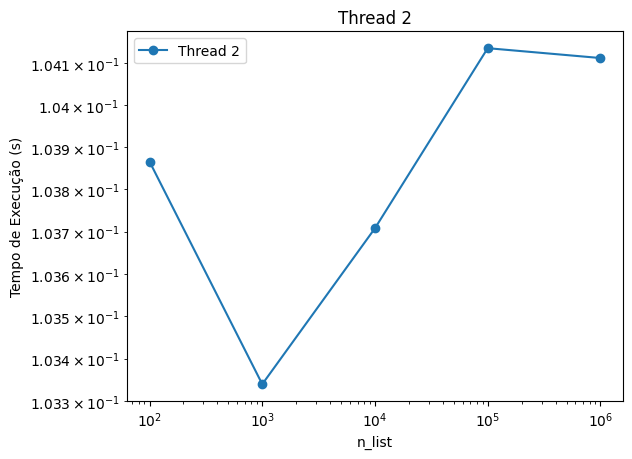

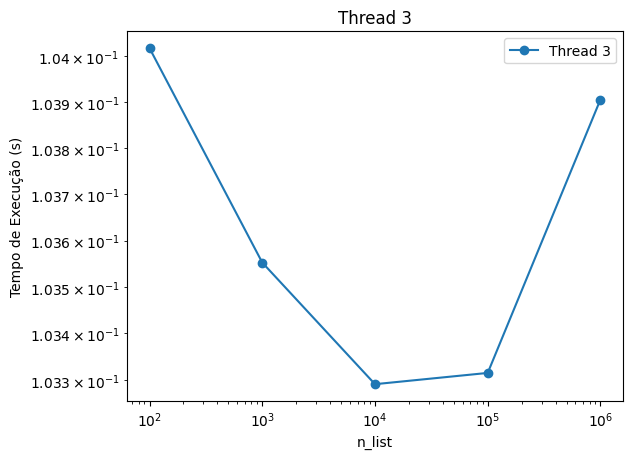

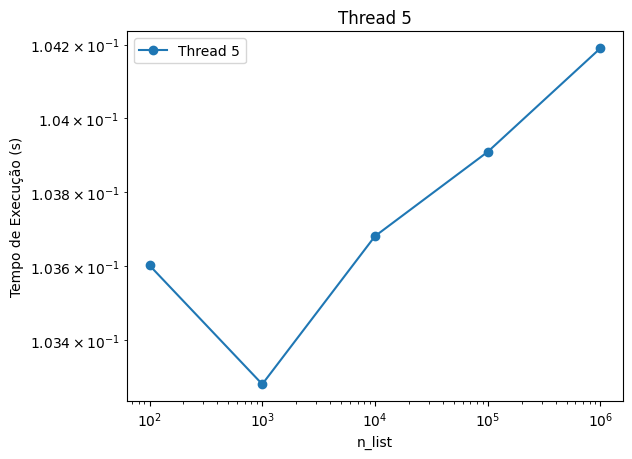

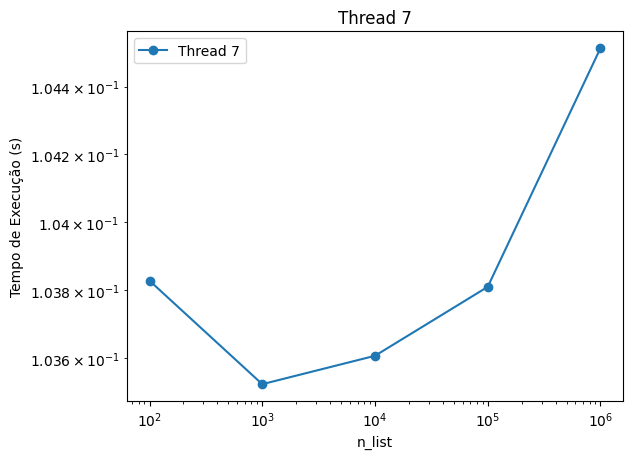

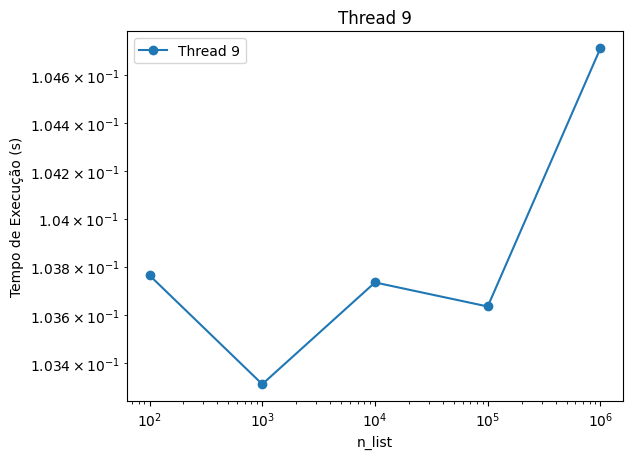

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

n_list = [100, 1000, 10000, 100000, 1000000]  # x
threads = [2, 3, 5, 7, 9]

num_runs = 10

for j in range(len(threads)):
    runtime_dict = {}

    for i in range(len(n_list)):
        runtimes = []
        for _ in range(num_runs):
            start_time = time.time()
            !./questao1 {n_list[i]} {threads[j]}
            runtime = time.time() - start_time
            runtimes.append(runtime)
        avg_runtime = np.mean(runtimes)
        runtime_dict[n_list[i]] = avg_runtime

    x = list(runtime_dict.keys())
    y = list(runtime_dict.values())

    plt.plot(x, y, marker='o', label=f'Thread {threads[j]}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('n_list')
    plt.ylabel('Tempo de Execução (s)')
    plt.title(f'Thread {threads[j]}')
    plt.legend()
    plt.show()


No contexto de um programa em C, os parâmetros argc e argv são usados para receber argumentos da linha de comando quando o programa é executado.

- argc (argument count) é um inteiro que representa o número total de argumentos fornecidos na linha de comando, incluindo o próprio nome do programa. Ou seja, argc indica quantos elementos existem na matriz argv.

- argv (argument vector) é uma matriz de strings (vetor de ponteiros para caracteres) que contém os argumentos fornecidos na linha de comando. Cada elemento da matriz argv é uma string que representa um argumento.

A relação entre argc e argv é a seguinte:

- argv[0] é uma string que contém o nome do próprio programa. É comum que argv[0] seja o caminho completo do arquivo executável.
- argv[1] é uma string que contém o primeiro argumento fornecido na linha de comando.
- argv[2] é uma string que contém o segundo argumento fornecido na linha de comando.

E assim por diante...
Por exemplo, se você executar o programa da seguinte forma:

./programa arg1 arg2 arg3

###**Questão nro. 2 (4 pontos):**

Em nossas aulas tivemos a oportunidade de executar o problema Saxpy com a biblioteca Thrust. Você pode encontrar o código executado em aula neste endereço: https://insper.github.io/supercomp/aulas/16-gpu-customizacao/.

Sua tarefa:

Implemente uma versão do Saxpy com OpenMP (8 threads por padrão). [2 pontos]

Execute a versão com OpenMP e a versão em GPU. Compare os tempos de execução. No caso da GPU ser mais rápida, busque aumentar o número de threads do OpenMP (até um limite de 32). O tempo de execução do OpenMP melhorou? Justifique também caso OpenMP esteja sendo mais rápido que GPU. Há algo relacionado a movimentação de dados entre CPU e GPU? [2 pontos]

In [ ]:
%%writefile questao2.cpp

#include <iostream>
#include <stdlib.h>
#include <chrono>
#include <random>
#include <vector>
#include <omp.h>
#include <iomanip>
#include <math.h>
# include <time.h>
using namespace std;

int main(int argc, char *argv[]){
  auto t_start = std::chrono::high_resolution_clock::now();
  int n = atoi(argv[1]);  // n aleatório dado pelo usuário. 
  int m = atoi(argv[2]);

  vector<long int> a(n, 0);
  vector<long int> b(n, 0);
  vector<long int> c(n, 0);

  srand(time(NULL));

  #pragma omp parallel
  for (int i = 0; i < n; i++){
    int a_num = rand();
    int b_num = rand();
    a[i] = a_num;
    b[i] = b_num;
    //cout  << "Número sorteado: " << a[i] << " " << b[i] << endl;
  }

  #pragma omp parallel for shared(c)
  for (int i = 0; i < n; i++){
    long int conta = m*a[i] + b[i];
    c[i] = conta;
  }

  //for (int i = 0; i < n; i++ ){
  //  cout << setw(8) << c[i] << " = " 
  //  << setw(2) << m
  //  << "*" << setw(5) << a[i]
  //  << "+" << setw(5) << b[i]
  //  << endl;
 // }

  auto t_end = std::chrono::high_resolution_clock::now();

  double elapsed_time_ms = std::chrono::duration<double, std::milli>(t_end-t_start).count();
  double elapsed_time_s = elapsed_time_ms/1000;
  //std::cout << "Tempo de execução: " << elapsed_time_s << " s" << std::endl;

  return 0;
}

Overwriting questao2.cpp


In [ ]:
!g++ -Wall -O3 -fopenmp -g questao2.cpp -o questao2

questao2.cpp: In function ‘int main(int, char**)’:
questao2.cpp:50:10: warning: unused variable ‘elapsed_time_s’ [-Wunused-variable]
   50 |   double elapsed_time_s = elapsed_time_ms/1000;
      |          ^~~~~~~~~~~~~~


In [ ]:
!./questao2 10 3

3214969585 =  3*507267270+1693167775
7347976513 =  3*2068300839+1143073996
2049612258 =  3*636695767+139524957
957023326 =  3*53961726+795138148
5452666510 =  3*1814797117+8275159
6473525905 =  3*1784735893+1119318226
7051686300 =  3*2068351647+846631359
3513159166 =  3*535073966+1907937268
1933533858 =  3*378662920+797545098
3229246364 =  3*569413172+1521006848
Tempo de execução: 0.00941509 s


In [ ]:
%%writefile saxpy.cu
#include <thrust/host_vector.h>
 #include <thrust/device_vector.h>
 #include <thrust/generate.h>
 #include <thrust/functional.h>
 #include <thrust/copy.h>
 #include <cstdlib>
 #include <algorithm>
 #include <iostream>
 #include <iomanip>

 using namespace  std;

struct saxpy
{
    int a;    
    saxpy(int a_) : a(a_) {};
    __host__ __device__
    double operator()(const int& x, const int& y) {
           return a * x + y;
    }
};

int main(int argc, char* argv[]) {
     if (argc != 3) {
         cerr <<
          "***Numero incorreto de argumentos ***\n";
         return 1;
     }

     int n = atoi(argv[1]);
     int m = atoi(argv[2]);

     //gerar numeros aleatorios
     thrust::host_vector<int> a(n);
     thrust::host_vector<int> b(n);
     thrust::host_vector<int> c(n);
     thrust::generate(a.begin(), a.end(), rand);
     thrust::generate(b.begin(), b.end(), rand);

     //transferimos para a GPU
     thrust::device_vector<int> d_a = a;
     thrust::device_vector<int> d_b = b;

     //transformacao

     thrust::transform(d_a.begin(), d_a.end(),
                       d_b.begin(), d_b.end(),
                       saxpy(m));

     thrust::copy(d_b.begin(), d_b.end(),
     c.begin()); 

     //for (int i = 0; i < n; i++ )
     //    cout << setw(6) << c[i] << " = " 
     //     << setw(2) << m
     //     << "*" << setw(5) << a[i]
     //     << "+" << setw(5) << b[i]
     //     << endl;

}

Overwriting saxpy.cu


In [ ]:
!nvcc saxpy.cu -o saxpy

In [ ]:
!./saxpy 10 3

1025202362 =  3*1804289383+1025202362
1350490027 =  3*846930886+1350490027
783368690 =  3*1681692777+783368690
1102520059 =  3*1714636915+1102520059
2044897763 =  3*1957747793+2044897763
1967513926 =  3*424238335+1967513926
1365180540 =  3*719885386+1365180540
1540383426 =  3*1649760492+1540383426
304089172 =  3*596516649+304089172
1303455736 =  3*1189641421+1303455736


Agora vamos plotar um gráfico de comparação de tempo

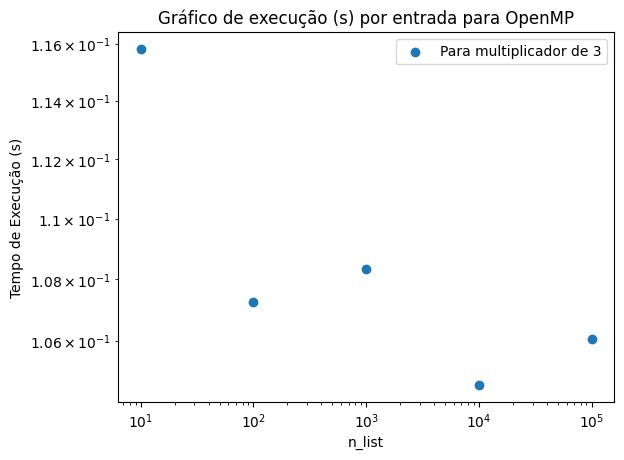

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

runtime_dict = {0: [], 1: [], 2: [], 3: [], 4: []}  # y
n_list = [10, 100, 1000, 10000, 100000]  # x
multiplicador = [3, 3, 3, 3, 3]

num_runs = 10

for i in range(len(n_list)):
    for j in range(len(multiplicador)):
        runtimes = []
        for _ in range(num_runs):
            start_time = time.time()
            !./questao2 {n_list[i]} {multiplicador[j]}
            runtime = time.time() - start_time
            runtimes.append(runtime)
        avg_runtime = np.mean(runtimes)
        runtime_dict[j].append(avg_runtime)

plt.scatter(n_list, runtime_dict[j], label=f'Para multiplicador de 3')
plt.xscale('log')
plt.yscale('log')
plt.title('Gráfico de execução (s) por entrada para OpenMP')
plt.xlabel('n_list')
plt.ylabel('Tempo de Execução (s)')
plt.legend()
plt.show()


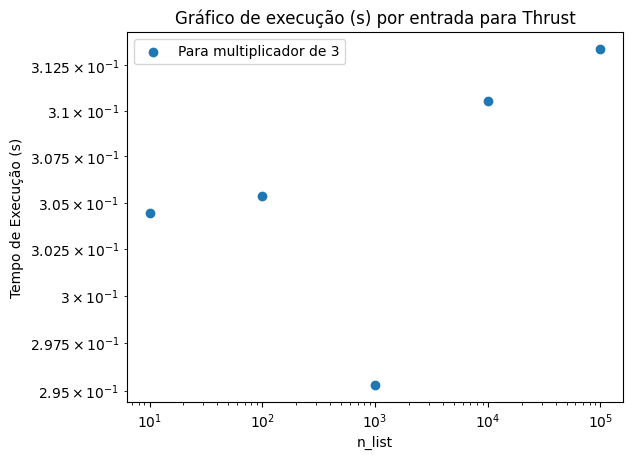

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

runtime_dict = {0: [], 1: [], 2: [], 3: [], 4: []}  # y
n_list = [10, 100, 1000, 10000, 100000]  # x
multiplicador = [3, 3, 3, 3, 3]

num_runs = 10

for i in range(len(n_list)):
    for j in range(len(multiplicador)):
        runtimes = []
        for _ in range(num_runs):
            start_time = time.time()
            !./saxpy {n_list[i]} {multiplicador[j]}
            runtime = time.time() - start_time
            runtimes.append(runtime)
        avg_runtime = np.mean(runtimes)
        runtime_dict[j].append(avg_runtime)

plt.scatter(n_list, runtime_dict[j], label=f'Para multiplicador de 3')
plt.xscale('log')
plt.yscale('log')
plt.title('Gráfico de execução (s) por entrada para Thrust')
plt.xlabel('n_list')
plt.ylabel('Tempo de Execução (s)')
plt.legend()
plt.show()


###**Questão nro. 3 (2 pontos):**

 Implemente a versão do código abaixo com Thrust. Atente-se ao tratamento adequado para a geração de números aleatórios. Você deve usar, obrigatoriamente, a implementação transform-reduce da biblioteca Thrust, disponı́vel em https://tinyurl.com/3namnuhv

```cpp
 #include <random>
 #include <iostream>
 #include <omp.h>
 #include <vector>
 using namespace std;
 int main () {
    long N = 100000000L;
    long sum = 0;
    default_random_engine generator;
    uniform_real_distribution<double> distribution(0.0, 1.0);
    for (long i = 0; i < N; i++) {
        double x, y;
        x = distribution(generator);
        y = distribution(generator);
        if (x*x + y*y <= 1) {
            sum++;
        }
    }
    double pi = 4.0 * sum / N;
    cout << pi << endl;
    cout << sum << endl;

}
```

critical - varias threads tentando acessar a posição 2

In [ ]:
%%writefile questao3.cu
#include <thrust/device_vector.h>
#include <thrust/host_vector.h>
#include <thrust/transform_reduce.h>
#include <thrust/functional.h>
#include <thrust/transform.h>
#include <thrust/random.h>
#include <iostream>
#include <fstream>
#include <iomanip>
#include <cstdlib>
#include <chrono>
#include <cstdlib>
#include <algorithm>
#include <cmath>
#include <random>

#define N 10000000

struct rng_gpu {
    __device__ __host__
    double operator() (int seed) {
        thrust::default_random_engine en_gpu(seed);
        thrust::uniform_real_distribution<double> d(0,1);
        return d(en_gpu);
    }
};

struct add_squares
{
    __host__ __device__
    double operator()(const double& x, const double& y) {
        return x*x + y*y;
    }
};

struct greater_than_one {
    __device__ __host__
    double operator() (double num) {
        return num <= 1 ? 1 : 0;
    }
};

int main(){

    // Initialize Vectors using random number generation
    thrust::device_vector<double> X(N);
    thrust::device_vector<double> Y(N);
    thrust::transform(thrust::make_counting_iterator(0), thrust::make_counting_iterator(N), X.begin(), rng_gpu());
    thrust::transform(thrust::make_counting_iterator(N), thrust::make_counting_iterator(2*N), Y.begin(), rng_gpu());

    // Apply sum of squares transform
    thrust::transform(X.begin(), X.end(), Y.begin(), X.begin(), add_squares());
    thrust::transform(X.begin(), X.end(), X.begin(),  greater_than_one());
    double sum = thrust::reduce(X.begin(), X.end());

    // Use transform reduce to count occorruences of circle hit 
    double pi = 4.0 * sum / static_cast<double>(N);

    // Result is pi!
    std::cout << "Pi is: " << pi << std::endl;

    return 0;
}

Overwriting questao3.cu


In [ ]:
!nvcc questao3.cu -o questao3

In [ ]:
!./questao3

Pi is: 3.15653


In [ ]:
%%writefile correcao.cu
#include <thrust/device_vector.h>
#include <thrust/host_vector.h>
#include <thrust/transform_reduce.h>
#include <thrust/functional.h>
#include <thrust/transform.h>
#include <thrust/random.h>
#include <iostream>
#include <fstream>
#include <iomanip>
#include <cstdlib>
#include <chrono>
#include <cstdlib>
#include <algorithm>
#include <cmath>
#include <random>

#define N 10000000

struct rng_gpu {
    __device__ __host__
    double operator() (int seed) {
        thrust::default_random_engine en_gpu((seed*23778956)%151368);
        thrust::uniform_real_distribution<double> d(0,1);
        return d(en_gpu);
    }
};

struct add_squares
{
    __host__ __device__
    double operator()(const double& x, const double& y) {
        return x*x + y*y;
    }
};

struct greater_than_one {
    __device__ __host__
    double operator() (double num) {
        return num <= 1 ? 1 : 0;
    }
};

int main(){

    // Initialize Vectors using random number generation
    thrust::device_vector<double> X(N);
    thrust::device_vector<double> Y(N);
    thrust::transform(thrust::make_counting_iterator(0), thrust::make_counting_iterator(N), X.begin(), rng_gpu());
    thrust::transform(thrust::make_counting_iterator(N), thrust::make_counting_iterator(2*N), Y.begin(), rng_gpu());

    // Apply sum of squares transform
    thrust::transform(X.begin(), X.end(), Y.begin(), X.begin(), add_squares());

    // Use transform reduce to count occorruences of circle hit 
    double pi = 4.0*thrust::transform_reduce(X.begin(), X.end(), greater_than_one(), 0, thrust::plus<double>())/(double)N;

    // Result is pi!
    std::cout << "Pi is: " << pi << std::endl;

    return 0;
}

Overwriting correcao.cu


In [ ]:
!nvcc correcao.cu -o correcao

In [ ]:
!./correcao

Pi is: 3.15526


## **Questão nro. 4 (2 pontos):**

 Suponha que queiramos comparar duas sequencias de tamanho múltiplo
de k, k > 1. Ao invés de cada core da GPU comparar somente dois aminoácidos de cada vez, poderíamos comparar 2k aminoácidos de cada vez. Abaixo temos um exemplo com k = 3, para duas sequencias com 9
aminoácidos:


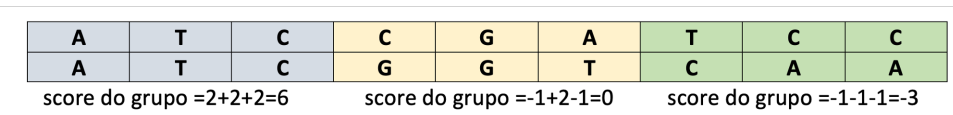
Para cada grupo de k = 3 aminoácidos, calculamos o score simples entre eles (+2 para match e -1 para mismatch). Calculando o máximo entre os scores dos grupos, obtemos o score máximo de 6. Implemente um kernel utilizando Thrust que receba o valor de k, assim como as duas sequencias de
tamanho múltiplo de k, e calcule o score entre as duas sequencias com os pesos indicados anteriormente. Implemente, adicionalmente, um programa para testar o seu kernel.


In [ ]:
%%writefile questao4.cu
#include <thrust/device_vector.h>
#include <thrust/host_vector.h>
#include <thrust/transform_reduce.h>
#include <thrust/functional.h>
#include <thrust/transform.h>
#include <thrust/random.h>
#include <iostream>
#include <fstream>
#include <iomanip>
#include <cstdlib>
#include <chrono>
#include <cstdlib>
#include <algorithm>
#include <string>
#include <string.h>
#include <sstream>
#include <iterator>
#include <vector>
using namespace std;

struct compare_groups {
    int length;

    compare_groups(int length_) : length(length_) {}

    __host__ __device__
    int operator()(const char* g1, const char* g2) {
        // Alocar memória no device
        char* dev_str1;
        char* dev_str2;
        cudaMalloc((void**)&dev_str1, length * sizeof(char));
        cudaMalloc((void**)&dev_str2, length * sizeof(char));

        // Copiar dados para o device
        cudaMemcpy(dev_str1, g1, length * sizeof(char), cudaMemcpyHostToDevice);
        cudaMemcpy(dev_str2, g2, length * sizeof(char), cudaMemcpyHostToDevice);

        // Criar thrust::device_ptr a partir dos ponteiros no device
        thrust::device_ptr<const char> dev_ptr_str1(dev_str1);
        thrust::device_ptr<const char> dev_ptr_str2(dev_str2);

        bool equal = thrust::equal(dev_ptr_str1, dev_ptr_str1 + length, dev_ptr_str2);

        // Liberar memória no device
        cudaFree(dev_str1);
        cudaFree(dev_str2);

        if (equal) {
            return 2;
        } else {
            return -1;
        }
    }
};

int main() {
    // Initialize Vectors using random number generation
    int k;
    std::cin >> k;

    int len_seq1;
    int len_seq2;

    std::cin >> len_seq1;
    std::cin >> len_seq2;

    thrust::host_vector<std::string> Seq1(len_seq1);
    thrust::host_vector<std::string> Seq2(len_seq2);

    for (int j = 0; j < int(Seq1.size() / k); j++) {
        std::string novaString;

        for (int i = 0; i < k; i++) {
            char c;
            std::cin >> c;
            novaString += c; // concatenar o caractere à nova string
        }

        Seq1[j] = novaString; // atribuir a nova string ao elemento do vetor
    }

    for (int j = 0; j < int(Seq2.size() / k); j++) {
        std::string novaString;

        for (int i = 0; i < k; i++) {
            char c;
            std::cin >> c;
            novaString += c; // concatenar o caractere à nova string
        }

        Seq2[j] = novaString; // atribuir a nova string ao elemento do vetor
    }

    // Criar um vetor de ponteiros para strings no host
    std::vector<const char*> h_seq1(len_seq1);
    std::vector<const char*> h_seq2(len_seq2);

    for (int j = 0; j < Seq1.size(); j++) {
        h_seq1[j] = Seq1[j].c_str(); // Obter o ponteiro para a string
        h_seq2[j] = Seq2[j].c_str();
    }

    // Criar os device_vectors e copiar os dados do host para o device
    thrust::device_vector<const char*> d_seq1 = h_seq1;
    thrust::device_vector<const char*> d_seq2 = h_seq2;

    compare_groups comp(k);
    thrust::device_vector<int> scores(int(len_seq1 / k));
    thrust::transform(d_seq1.begin(), d_seq1.end(), d_seq2.begin(), scores.begin(), comp);

    for (int i = 0; i < int(scores.size()); i++) {
        std::cout << scores[i] << std::endl;
    }

    // Encontrar o valor máximo entre os scores
    int max_score = thrust::reduce(scores.begin(), scores.end(), -1, thrust::maximum<int>());

    std::cout << "Máximo score: " << max_score << std::endl;

    return 0;
}


Overwriting questao4.cu


In [ ]:
!nvcc questao4.cu -o questao4

questao4.cu(35): warning #20011-D: calling a __host__ function("cudaMemcpy") from a __host__ __device__ function("compare_groups::operator ()") is not allowed

questao4.cu(36): warning #20011-D: calling a __host__ function("cudaMemcpy") from a __host__ __device__ function("compare_groups::operator ()") is not allowed

questao4.cu(42): warning #20011-D: calling a __host__ function("bool thrust::equal< ::thrust::device_ptr<const char> ,  ::thrust::device_ptr<const char> > (T1, T1, T2)") from a __host__ __device__ function("compare_groups::operator ()") is not allowed



In [ ]:
!./questao4 < dna.seq

0
0
0
Máximo score: 0


In [ ]:
%%writefile teste.cu

#include <iostream>
#include <cstring>
#include <thrust/device_ptr.h>
#include <thrust/equal.h>

int main() {
    const char* str1 = "ATCG";
    const char* str2 = "ATCD";

    size_t length = std::strlen(str1);

    // Alocar memória no device
    char* dev_str1;
    char* dev_str2;
    cudaMalloc((void**)&dev_str1, length * sizeof(char));
    cudaMalloc((void**)&dev_str2, length * sizeof(char));

    // Copiar dados para o device
    cudaMemcpy(dev_str1, str1, length * sizeof(char), cudaMemcpyHostToDevice);
    cudaMemcpy(dev_str2, str2, length * sizeof(char), cudaMemcpyHostToDevice);

    // Criar thrust::device_ptr a partir dos ponteiros no device
    thrust::device_ptr<const char> dev_ptr_str1(dev_str1);
    thrust::device_ptr<const char> dev_ptr_str2(dev_str2);

    bool equal = thrust::equal(dev_ptr_str1, dev_ptr_str1 + length, dev_ptr_str2);

    if (equal) {
        std::cout << "As strings são iguais." << std::endl;
    } else {
        std::cout << "As strings são diferentes." << std::endl;
    }

    // Liberar memória no device
    cudaFree(dev_str1);
    cudaFree(dev_str2);

    return 0;
}


Overwriting teste.cu


In [ ]:
!nvcc teste.cu -o teste

In [ ]:
!./teste

As strings são diferentes.
